<h1>PHILIPPINE DENGUE CASES</h1>
<hr>
<h2>Analyst: Jessie Mompero</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

<h1>DATASET</h1>

In [2]:
dengue_df = pd.read_csv('datasets//dengue.csv')
dengue_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<H1>ADDING COLUMNS</H1>

In [3]:
def get_season(month):
    if month in ['November', 'December', 'January', 'February']:
        return 'Cool Dry'
    elif month in ['March', 'April', 'May']:
        return 'Hot Dry'
    else:
        return 'Wet'

dengue_df['Season'] = dengue_df['Month'].apply(get_season)
dengue_df['Case_Fatality_Rate'] = np.round(dengue_df['Dengue_Deaths'] / dengue_df['Dengue_Cases'],4)
dengue_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Season,Case_Fatality_Rate
0,January,2016,Region I,705,1,Cool Dry,0.0014
1,February,2016,Region I,374,0,Cool Dry,0.0000
2,March,2016,Region I,276,0,Hot Dry,0.0000
3,April,2016,Region I,240,2,Hot Dry,0.0083
4,May,2016,Region I,243,1,Hot Dry,0.0041
...,...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,Wet,0.0000
1016,September,2020,BARMM,16,8,Wet,0.5000
1017,October,2020,BARMM,13,9,Wet,0.6923
1018,November,2020,BARMM,15,1,Cool Dry,0.0667


<h1>FILLING UP NULL VALUES</h1>

In [4]:
dengue_df.isnull().sum()

Month                 0
Year                  0
Region                0
Dengue_Cases          0
Dengue_Deaths         0
Season                0
Case_Fatality_Rate    0
dtype: int64

<h1>DATA TYPES</h1>

In [5]:
dengue_df['Month'] = dengue_df['Month'].astype('category')
dengue_df['Region'] = dengue_df['Region'].astype('category')
dengue_df.dtypes

Month                 category
Year                     int64
Region                category
Dengue_Cases             int64
Dengue_Deaths            int64
Season                  object
Case_Fatality_Rate     float64
dtype: object

<H1>Q1: DENGUE CASES BY REGION FROM 2016-2020 ANALYSIS III ANALYSIS DURING 2020 </H1>

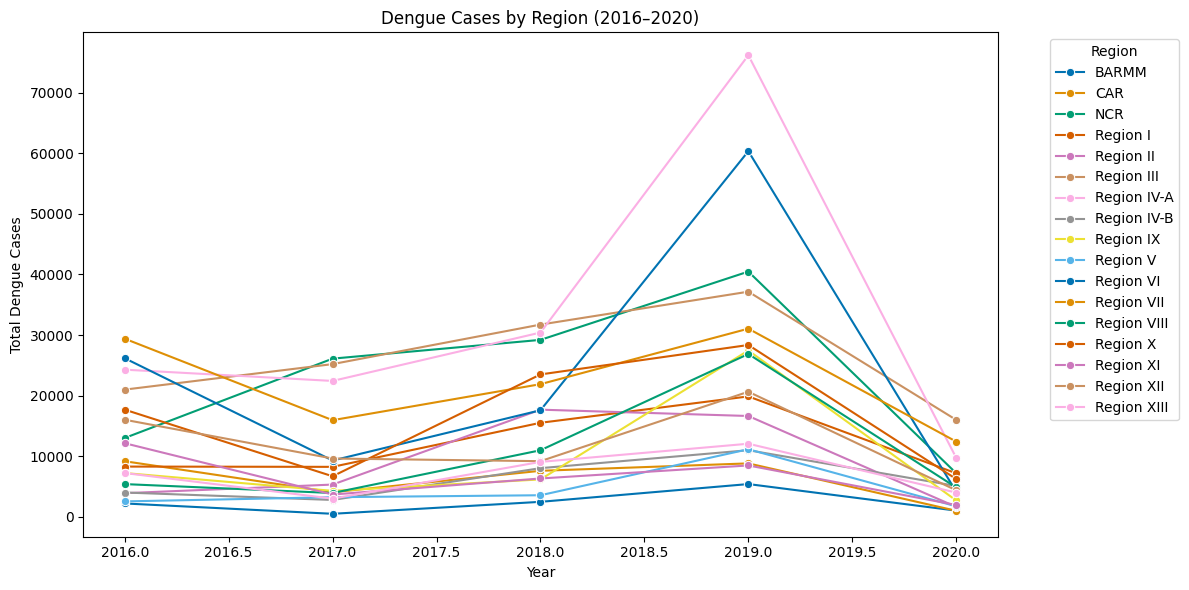

In [6]:
dengue_filtered = dengue_df[dengue_df['Year'].between(2016, 2020)]
region_yearly = dengue_filtered.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_yearly, x='Year', y='Dengue_Cases', hue='Region', marker='o', palette='colorblind')
plt.title('Dengue Cases by Region (2016–2020)')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insight No 1</h1>
<p>This is the Dengue Cases of Region during the year 2016-2020. The most noticable for me is the sudden drop of all cases among the regions from the year 2020. One of the factor that I can guess is the COVID 19 pandemic. Since people are quarantine, people mostly stay at their houses which contributed to the decrease in people who can be affected by dengue. Low number of dengue cases also means the there are also low number of people that can infect other like mapasa yung sakit.</p>

<H1>Q2: DENGUE DEATHS BY REGION FROM 2016-2020 ANALYSIS III ANALYSIS DURING 2020 </H1>

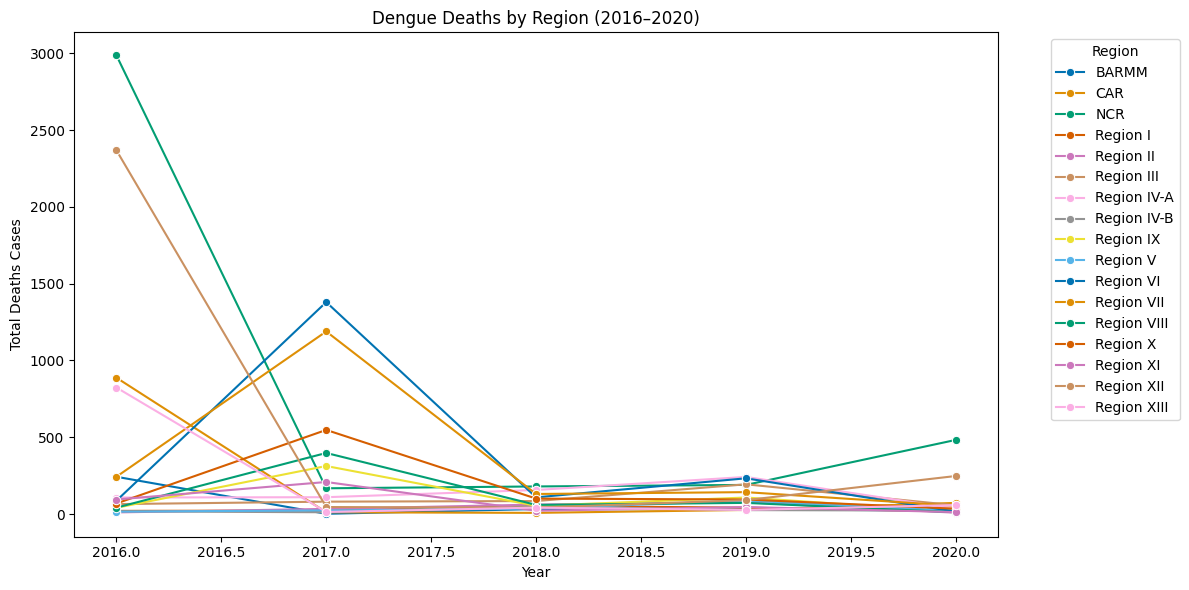

In [7]:
dengue_filtered = dengue_df[dengue_df['Year'].between(2016, 2020)]
region_yearly = dengue_filtered.groupby(['Year', 'Region'])['Dengue_Deaths'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_yearly, x='Year', y='Dengue_Deaths', hue='Region', marker='o', palette='colorblind')
plt.title('Dengue Deaths by Region (2016–2020)')
plt.xlabel('Year')
plt.ylabel('Total Deaths Cases')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insight No 2</h1>
<p>This is the Dengue Deathd by region during the year 2016-2020. Comparing this to previous visualization which is the Dengue Cases, we can see that despite the high dengue cases, there is low dengue deaths recorded but low means not zero which is still alarming. During 2016 from the REGION of NCR had the hifhest record exceeding 3000 dengue deaths. This is the highest so far in this database.</p>

<h1>ESTIMATED POPULATION PER REGION DURING YEAR 2020</h1>
<a href="https://ibb.co/DDxKd2fF"><img src="https://i.ibb.co/TBVhy3MG/Screenshot-2025-10-21-134927.png" alt="Screenshot-2025-10-21-134927" border="0"></a>

<H1>Q3: YEAR 2020 ANALYSIS</H1>

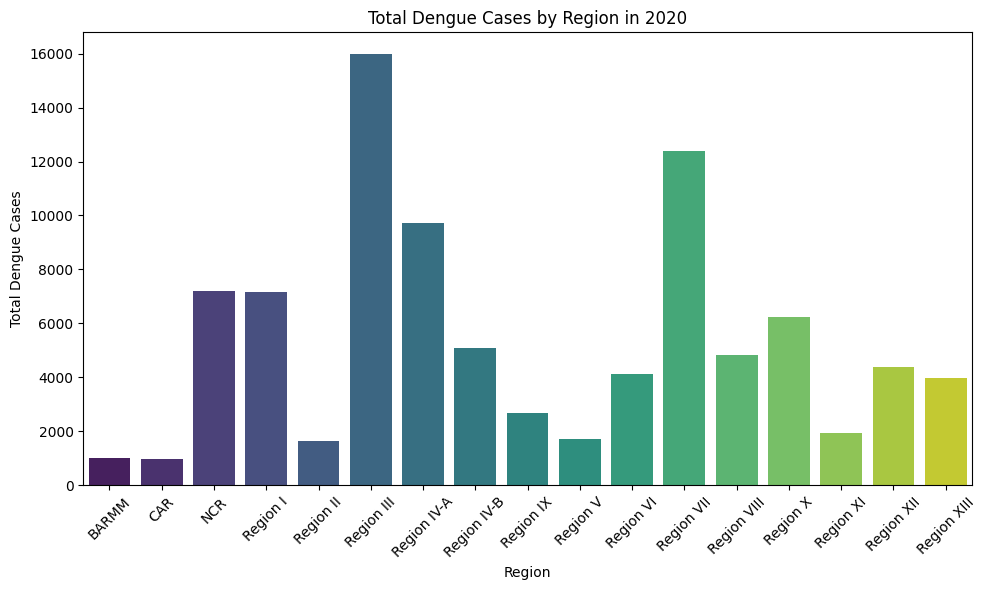

In [8]:
dengue_2020 = dengue_df[dengue_df['Year'] == 2020]
region_cases = dengue_2020.groupby('Region')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Dengue Cases by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h2>Insight No 3</h2>
<p>This is the Dengue Cases by Region in 2020, we can see that the REGION lll had the highest record of dengue cases from REGION Vll follow at second. One of the factor I think here is the population. RERION lll has the population of 12 million while the REGION Vll has 8 million, this factor has greatly affected the number of dengue cases. One of the factor could also be the COVID 19 pandemic.</p>

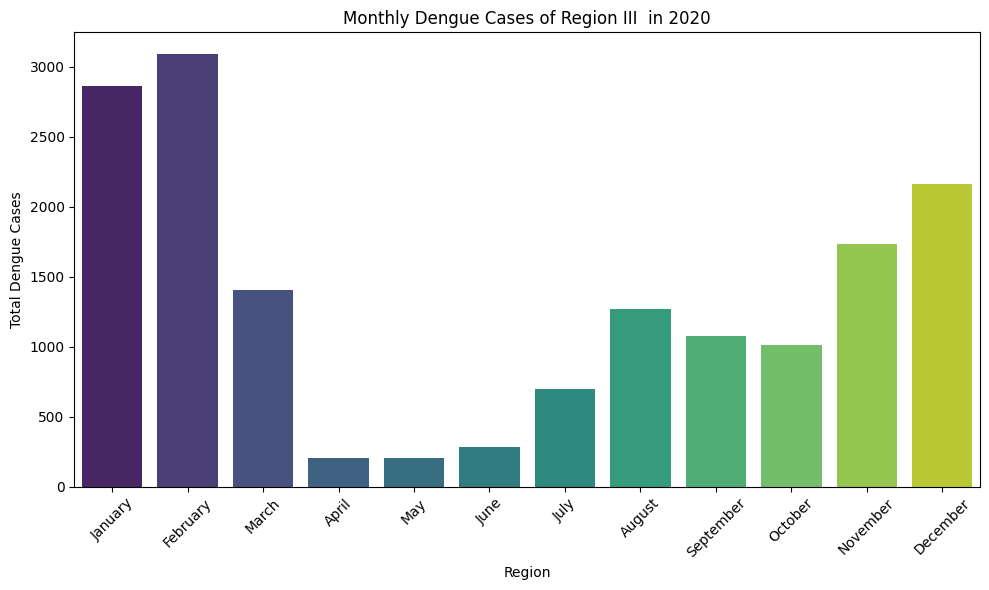

In [9]:
region_3 = dengue_2020[dengue_2020['Region'] == 'Region III'] 
region_cases = region_3.groupby('Month')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Dengue_Cases', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Dengue Cases of Region III  in 2020')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<H1>Insight No 4</H1>
<p>Now we dive deeper inside REGION III during YEAR 2020. We can see that February has the highest number of Dengue Cases exceeding 3000 while January follows with almost 3000. We can also see that during OCTOBER, it continue to rise until February, this pattern may give us that these are MOSQUITO season.</p>

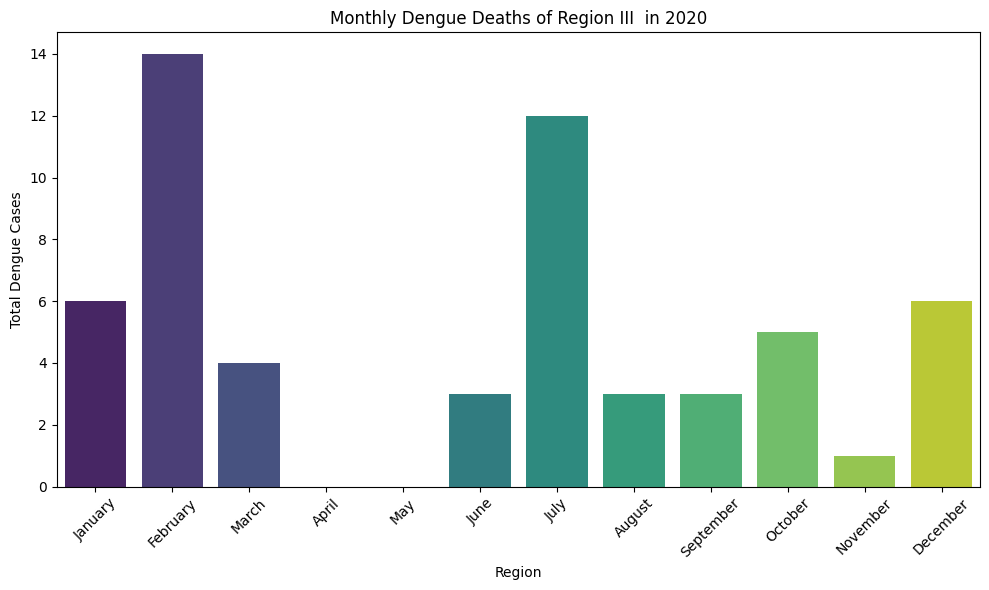

In [10]:
region_cases = region_3.groupby('Month')['Dengue_Deaths'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Dengue_Deaths', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Dengue Deaths of Region III  in 2020')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h1>Insight No 5</h1>
<p>We are still in REGION III, and now this is the monthly dengue deaths. Since february has the highest record of dengue cases, it also has the highest record of dengue deaths. The most noticable that I see is the January and July. January has almost 3000 dengue cases while July has almost 1000 case. Despite this difference, the month of July had higher record of deaths compared to January.</p>

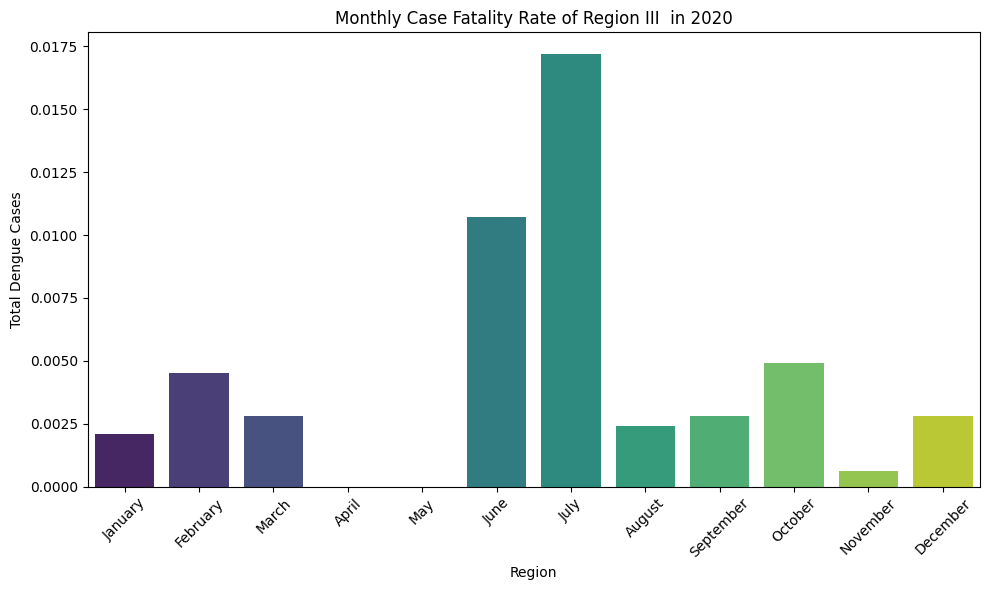

In [11]:
region_cases = region_3.groupby('Month')['Case_Fatality_Rate'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Case_Fatality_Rate', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Case Fatality Rate of Region III  in 2020')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h1>Insight No 6</h1>
<p>The sharp rise in fatality rate during the middle of 2020, especially in July, paints a picture of heightened vulnerability in Region III. Whether due to environmental factors, healthcare access, or pandemic related disruptions which I think is the most factor that affect the year 2020.</p>

<h1>Q4. YEAR 2016 ANALYSIS </h1>

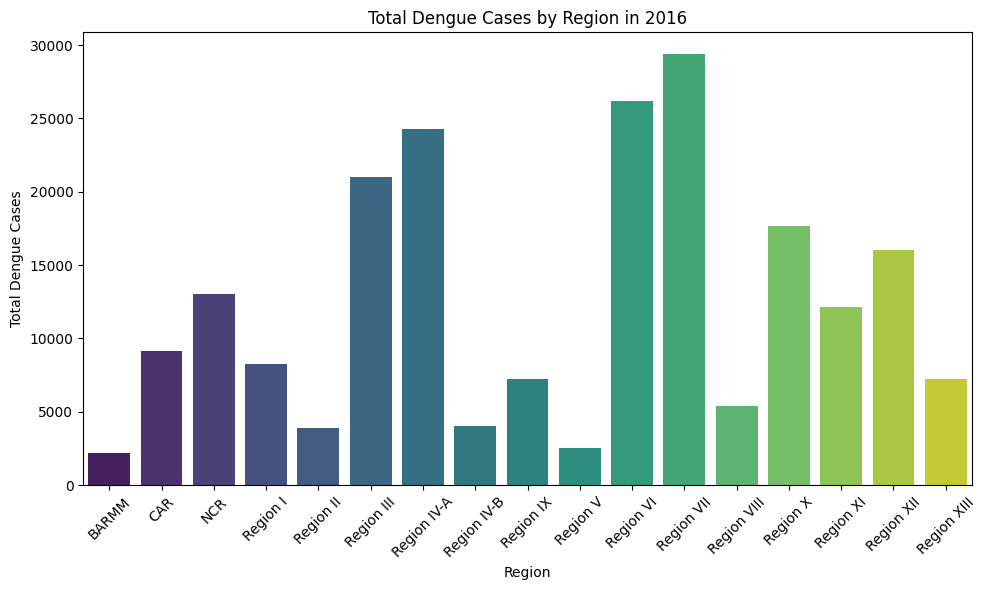

In [12]:
dengue_2016 = dengue_df[dengue_df['Year'] == 2016]
region_cases = dengue_2016.groupby('Region')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Dengue Cases by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h1>Insight No 7</h1>
<p>This is the Total Dengue Cases by Region during 2016, the most noticable here is the REGION VII which record is almost 30,000. Seing the number of record, the year 2016 had most dengue cases compared to 2020. During 2020, REGION III peak with almost 16,000 record. while here during 2016, REGION III is the is top 4 in highest record</p>

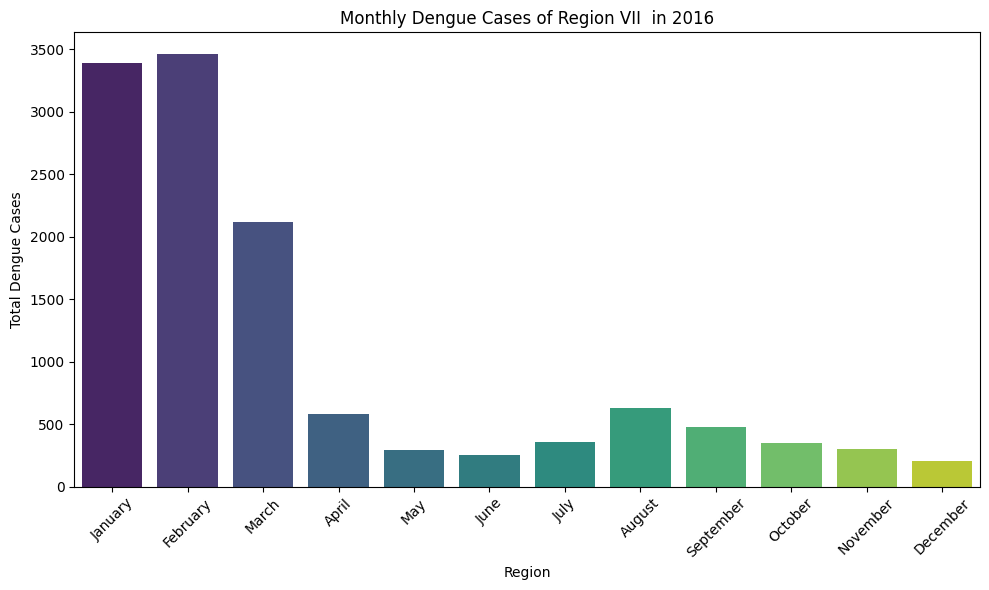

In [13]:
region_7 = dengue_2020[dengue_2020['Region'] == 'Region VII'] 
region_cases = region_7.groupby('Month')['Dengue_Cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Dengue_Cases', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Dengue Cases of Region VII  in 2016')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<H1>Insight No 8</H1>
<p>This is the Monthly dengue cases of REGION VII during year 2016. This is surprising because comparing this to year 2020 is very different. We can see here that February has the highest record then continue to decrease in december. One of the factor that I could think is the holiday season which is after poeple celebrate the holiday. More people means there are more people to be infected. There are so many peope outside compared to 2020 with COVID 19 pandemic</p>

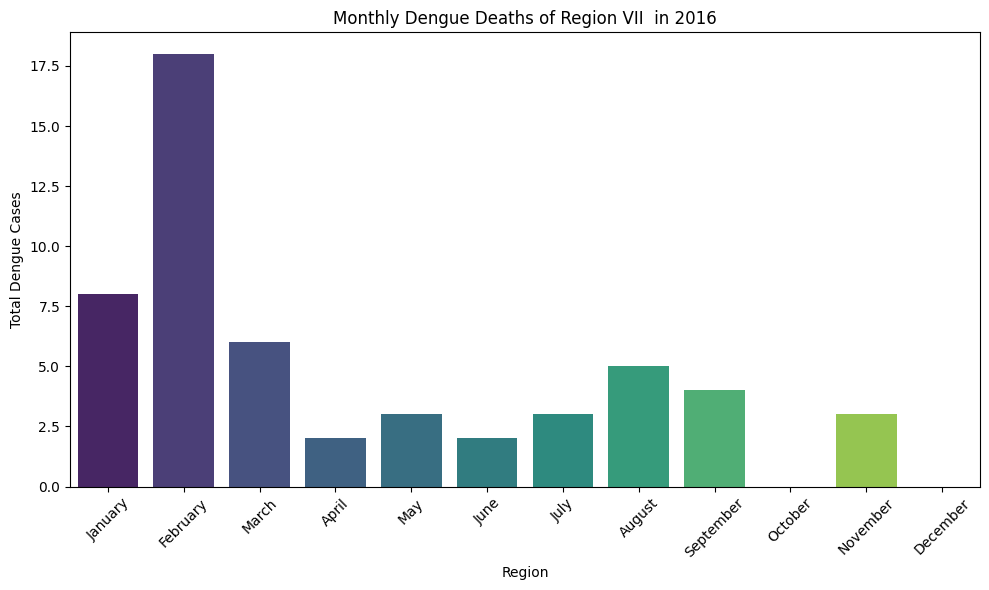

In [14]:
region_cases = region_7.groupby('Month')['Dengue_Deaths'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Dengue_Deaths', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Dengue Deaths of Region VII  in 2016')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h1>Insight No 9</h1>
<p>This is the monthly dengue deaths of Region VII during 2016, we can see that February has the highest record of death follwed by January. It is also noticeable that there is no record for October and December, i think that maybe, people that are affected during this month are new which give us that there is no fatal cases here. This also gives me the idea that you cant fully predict it. I can see some cases which month has the more cases of dengue but fewer dengue deaths like this one.</p>

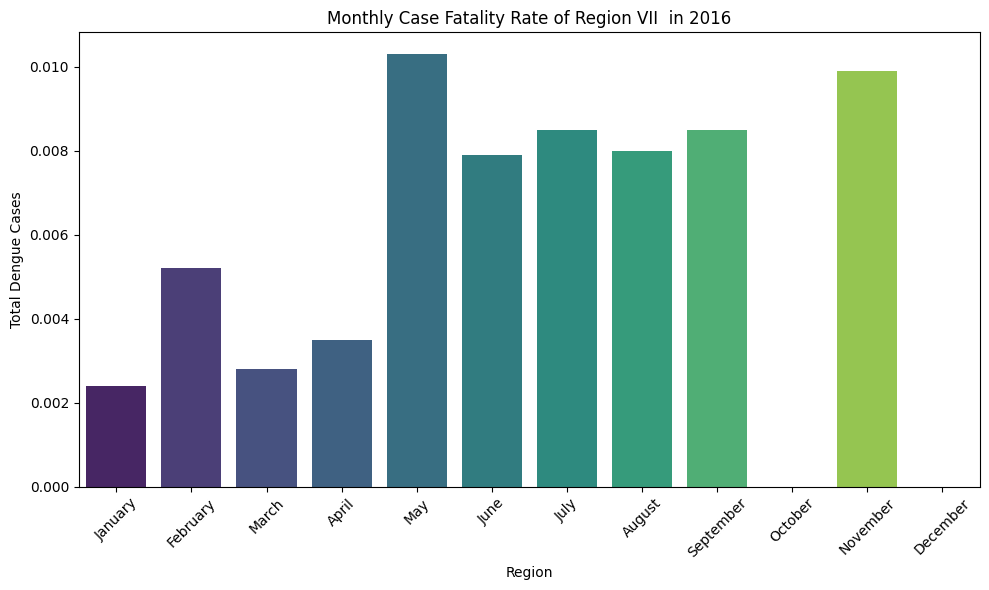

In [15]:
region_cases = region_7.groupby('Month')['Case_Fatality_Rate'].sum().reset_index()
plt.figure(figsize=(10, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(data=region_cases, x='Month', y='Case_Fatality_Rate', palette='viridis', order=month_order)
plt.xticks(rotation=45)
plt.title('Monthly Case Fatality Rate of Region VII  in 2016')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.tight_layout()
plt.show()

<h1>Insight No 10</h1>
<p>In Region VII during 2016, dengue was most deadly in May, with a noticeable rise again in November. Early months like April had fewer fatal cases, and October and  December had almost none. These patterns might reflect seasonal change which affect the fatality rate of dengue cases.</p>